In [613]:
# Enable multiple outputs of a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [614]:
# import all libraries
import pandas as pd
import networkx as nx
import numpy as np
from pyvis import network as net
import matplotlib.pyplot as plt

In [615]:
# import the transaction data as pandas dataframe
df = pd.read_csv('transactions.csv')
df

TX_ID  SENDER_ACCOUNT_ID  RECEIVER_ACCOUNT_ID   TX_TYPE  TX_AMOUNT  \
0              1               6456                 9069  TRANSFER     465.05   
1              2               7516                 9543  TRANSFER     564.64   
2              3               2445                 9356  TRANSFER     598.94   
3              4               2576                 4617  TRANSFER     466.07   
4              5               3524                 1773  TRANSFER     405.63   
...          ...                ...                  ...       ...        ...   
1323229  1323230               3733                 8051  TRANSFER     112.98   
1323230  1323231               2536                 8732  TRANSFER     459.64   
1323231  1323232               1466                 8586  TRANSFER     468.60   
1323232  1323233               1451                 3849  TRANSFER     562.36   
1323233  1323234                545                 2724  TRANSFER     415.57   

         TIMESTAMP  IS_FRAUD  ALERT_ID  
0                0     False        -1  
1                0     False        -1  
2                0     False        -1  
3                0     False        -1  
4                0     False        -1  
...            ...       ...       ...  
1323229        199     False        -1  
1323230        199     False        -1  
1323231        199     False        -1  
1323232        199     False        -1  
1323233        199     False        -1  

[1323234 rows x 8 columns]

In [616]:
# check rows with fraud transactions
df[df['IS_FRAUD'] == True]

TX_ID  SENDER_ACCOUNT_ID  RECEIVER_ACCOUNT_ID   TX_TYPE  TX_AMOUNT  \
81            82               6976                 9739  TRANSFER       4.85   
948          949               5776                 2570  TRANSFER      10.27   
6279        6280               9999                 9530  TRANSFER       2.74   
7998        7999               1089                 7352  TRANSFER      10.27   
12974      12975               7025                 9708  TRANSFER       3.53   
...          ...                ...                  ...       ...        ...   
1316270  1316271               2465                  707  TRANSFER      16.31   
1316635  1316636               1453                 8709  TRANSFER       2.81   
1317851  1317852               9446                  790  TRANSFER      11.64   
1322019  1322020               6969                 9529  TRANSFER       3.86   
1322710  1322711               8908                 3629  TRANSFER      10.98   

         TIMESTAMP  IS_FRAUD  ALERT_ID  
81               0      True       193  
948              0      True       377  
6279             1      True       189  
7998             1      True       377  
12974            2      True       130  
...            ...       ...       ...  
1316270        198      True       272  
1316635        199      True        44  
1317851        199      True       222  
1322019        199      True        74  
1322710        199      True       294  

[1719 rows x 8 columns]

In [617]:
# check unique values in "ALERT_ID" columns
df['ALERT_ID'].unique()

array([ -1, 193, 377, 189, 130, 183, 267, 176, 170,   8, 202, 260, 346,
       115, 374, 317,  41, 179,  39,  61,  32,  14, 323, 174, 166, 356,
       100, 242,  88, 363,  68, 138, 145, 330, 302, 387, 351,  79, 322,
       134, 326, 342,  66, 339, 258,  82,  75, 192, 241, 350, 284, 268,
       369, 150, 239, 380, 257, 123,  25, 252,  59, 190, 282, 313, 151,
        87, 365, 329, 214,  73,   1, 230, 210, 386,  54, 299, 102, 160,
       114,  20,  43, 295,  24, 185, 249, 296,  37, 218, 235, 216, 291,
       336, 196, 245,  97, 237, 389, 248,  91,  42, 318, 273, 304, 111,
       355, 132, 398, 104, 259, 379, 213, 340, 327,  52, 315,  40, 225,
       122,  58, 357,  30, 343, 233, 352, 382, 121, 359, 226, 393, 238,
       141, 396, 286,  10, 376, 178, 362, 131,  51, 246,  12, 142, 287,
       147,  48,  78, 103, 109, 278, 305,  96, 149,  55, 154,  83, 310,
        29, 269, 117, 277, 112,  89, 227,  22, 275,  81,  57, 345, 129,
       152, 319, 181, 347, 146,  84, 331, 271,   7, 110, 392, 32

In [620]:
# Build a subset from main dataframe, containing aggregate transactions from same accounts
full_df = pd.read_csv('transactions.csv', usecols=['SENDER_ACCOUNT_ID','RECEIVER_ACCOUNT_ID','TX_AMOUNT'], dtype='object')
full_df['TX_AMOUNT'] = full_df['TX_AMOUNT'].astype(float)

# take a random subset with 2000 columns
sub_df = txn_full.groupby(['SENDER_ACCOUNT_ID', 'RECEIVER_ACCOUNT_ID'],
                              as_index=False).agg({'TX_AMOUNT':['count','sum']}).sample(2000, random_state=2)
sub_df.columns = ['SOURCE','TARGET','TOTAL_COUNT','TOTAL_AMT']
sub_df['value'] = sub_df['TOTAL_AMT']

#reset indices of the subset dataframe
sub_df = sub_df.reset_index(drop=True)

In [640]:
sub_df

SOURCE TARGET  TOTAL_COUNT    TOTAL_AMT        value
0      9254   9684            1      1532.14      1532.14
1      3723   9031           20      3581.60      3581.60
2      3338   7782            2  10767077.05  10767077.05
3      5628   2622           20      3130.40      3130.40
4      1257   1753            3  21629864.69  21629864.69
...     ...    ...          ...          ...          ...
1995   9127   4500           19       117.23       117.23
1996   7625   2922           20      3297.00      3297.00
1997   9382   5085            1       228.81       228.81
1998   8938   9861           21      4326.42      4326.42
1999   2232   9769            3   4723294.92   4723294.92

[2000 rows x 5 columns]

In [622]:
# Define a directed network
A = nx.DiGraph()

# add nodes and edges from the subset data
A.add_edges_from([(row["SOURCE"], row["TARGET"]) for idx, row in sub_df.iterrows()])

<Figure size 2400x1800 with 0 Axes>

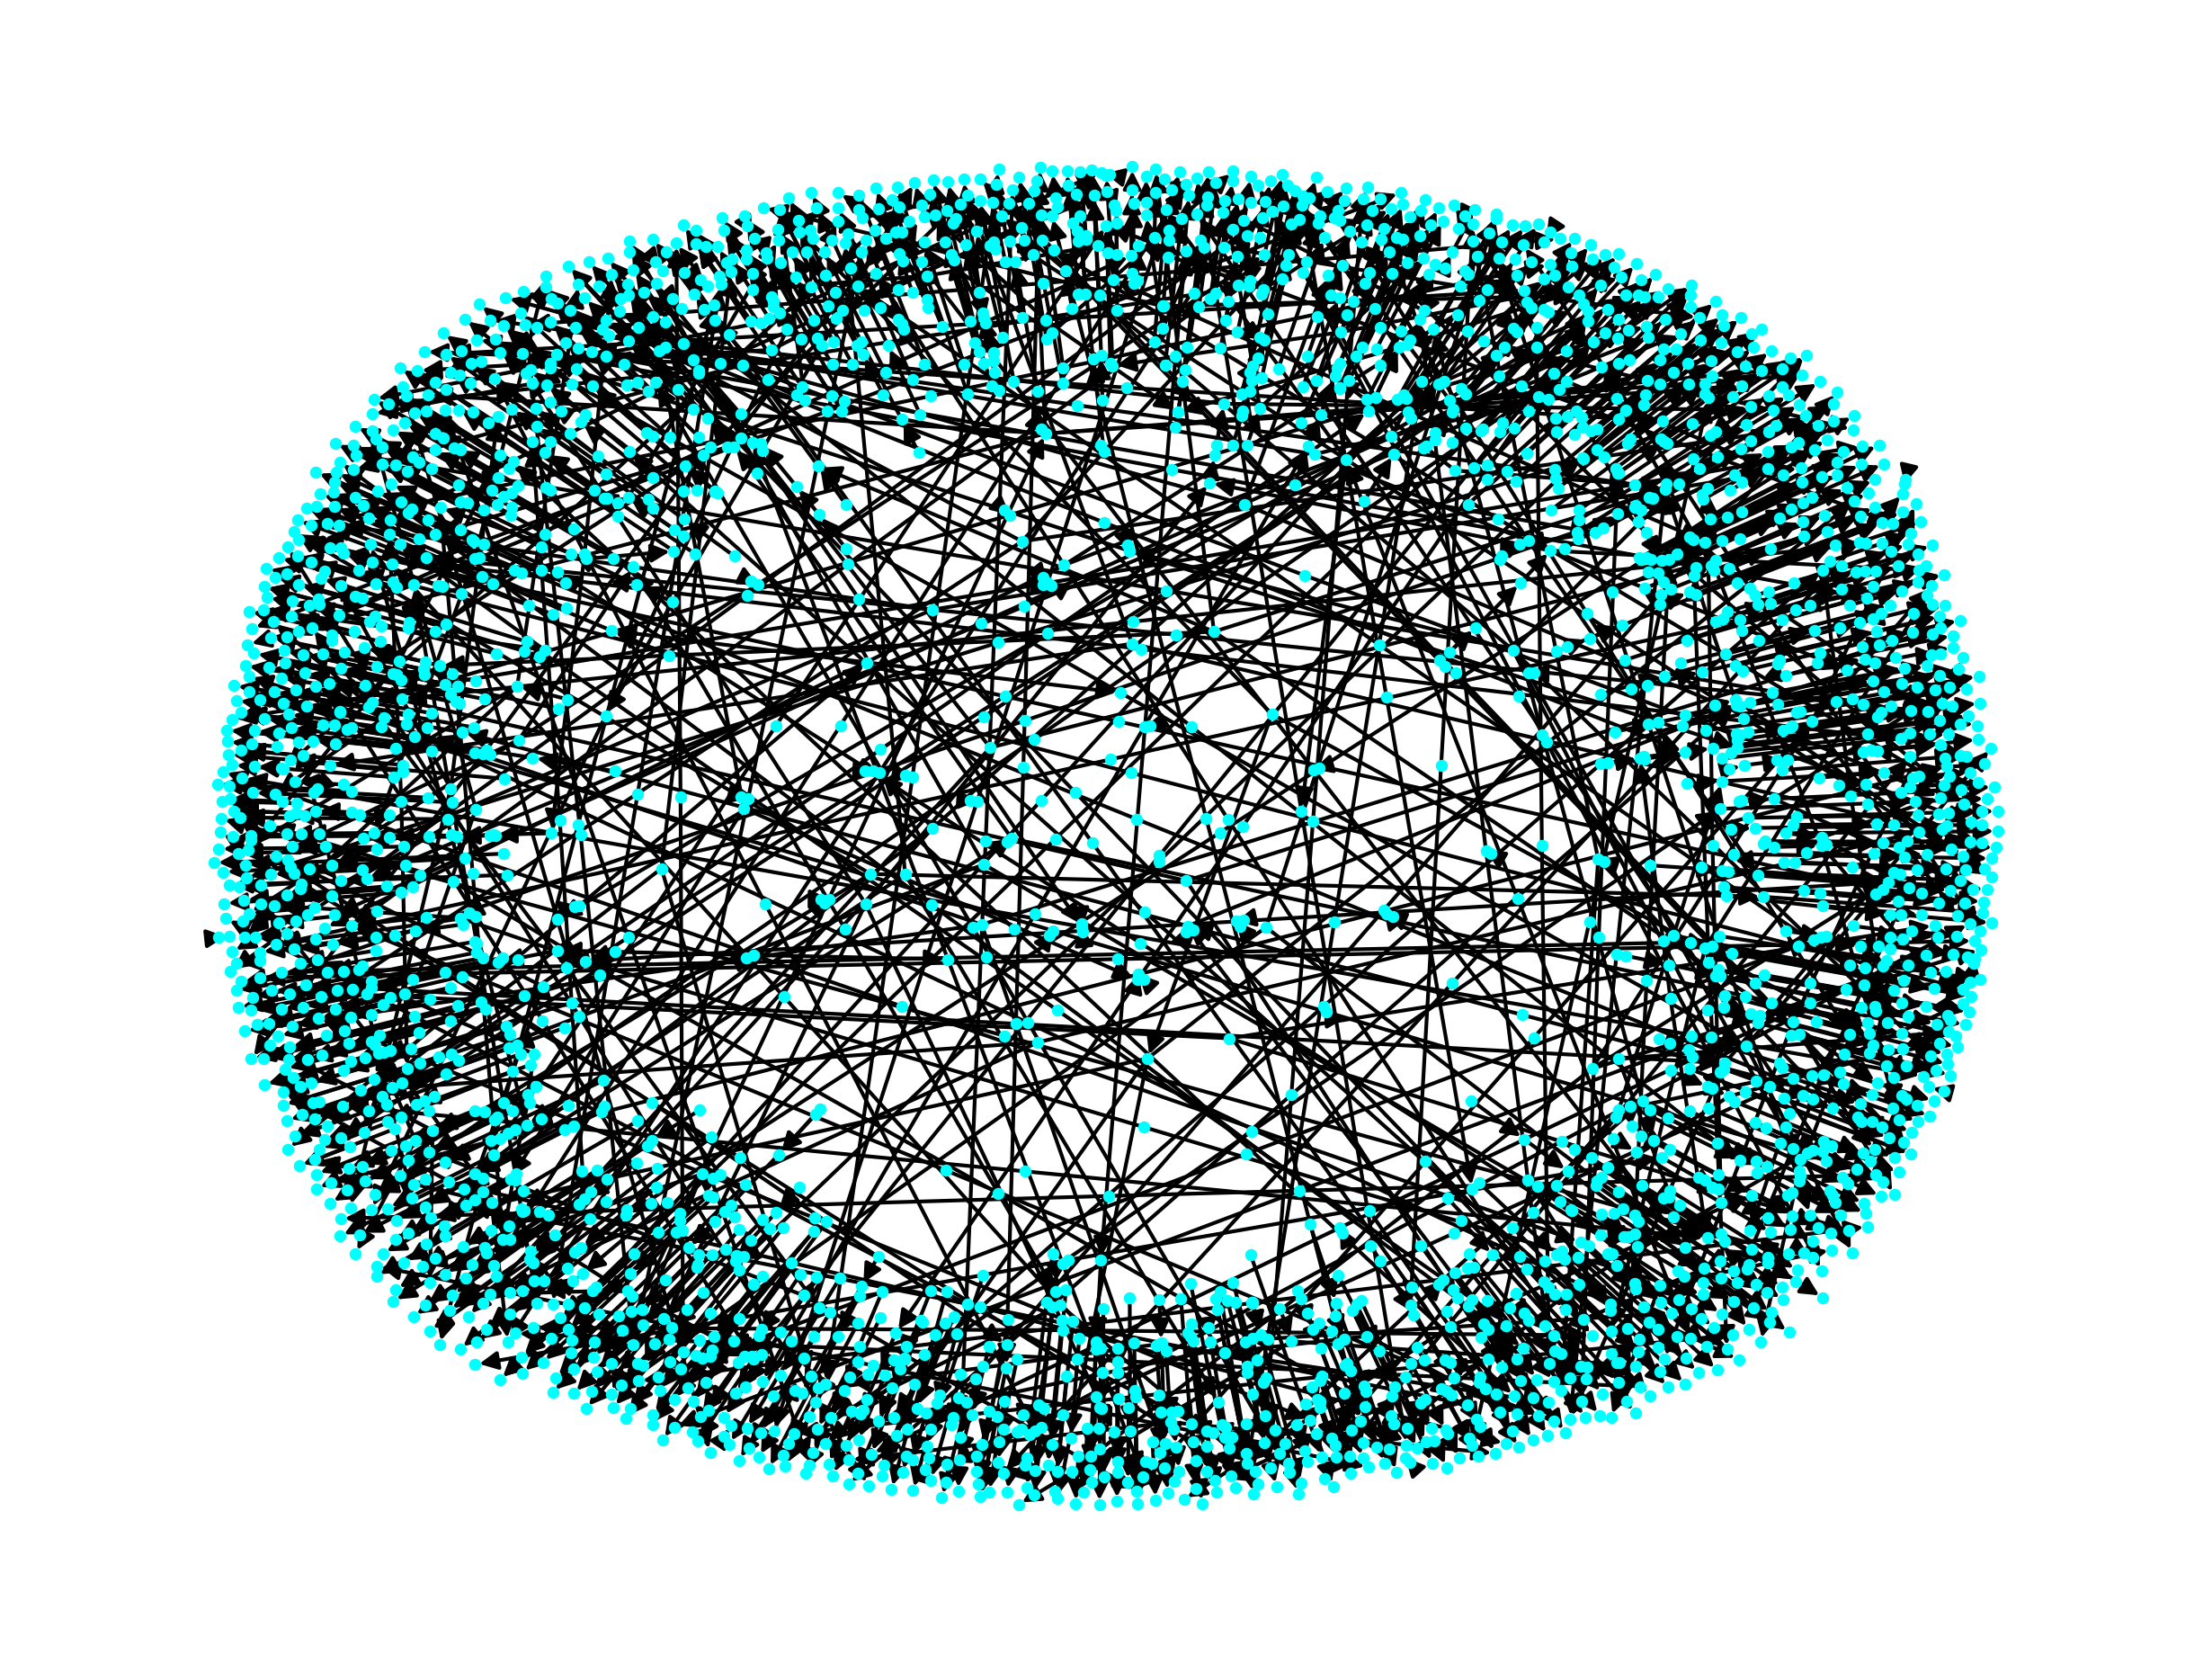

In [645]:
# plot graph for the directed network
plt.figure(figsize=(8,6), dpi = 300)
nx.draw(A, with_labels = False, node_size = 5, node_color = 'cyan')
plt.show()

In [625]:
# investigate number of nodes and edges in the network
A.number_of_nodes()
A.number_of_edges()

2997

2000

<Axes: xlabel='DEGREE'>

<Axes: xlabel='DEGREE'>

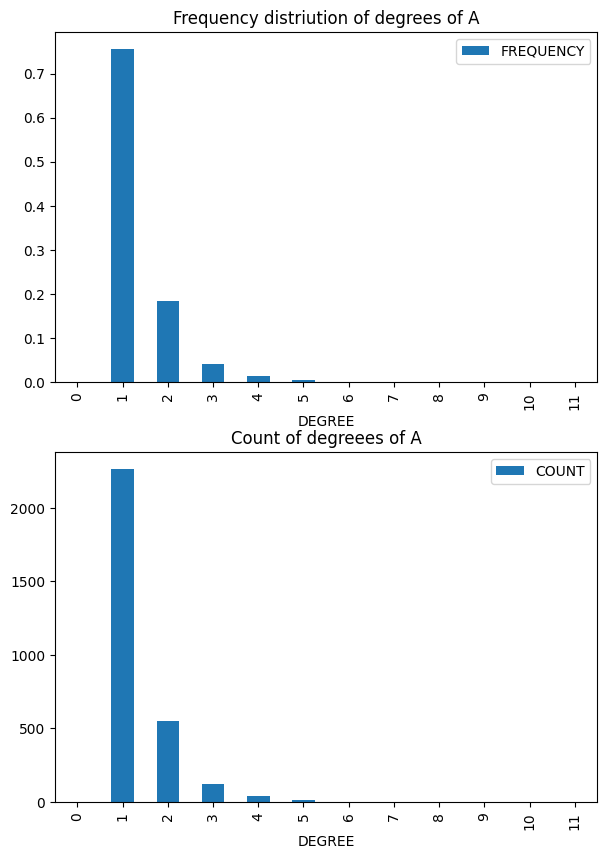

In [819]:
# Check Degree distriution in the network
degree_sequence_A=sorted([d for n, d in A.degree()], reverse=True)

#Obtain the unique values of the degrees, and the counts of each degree value
degree_unique_A=np.unique(degree_sequence_A, return_counts=True)

# Prepare the dataframes (degree and frequency) for visualizing the degree distriutions
degree_plot=list(range(0, max(degree_unique_A[0])+1))
freq_plot=[0] * len(list(range(0, max(degree_unique_A[0])+1)))
for i in degree_unique_A[0]:
    freq_plot[i]=degree_unique_A[-1][list(degree_unique_A[0]).index(i)]
    
d = {'DEGREE': degree_plot, 
     'FREQUENCY': freq_plot/sum(freq_plot)}
df_A = pd.DataFrame(data=d) # make a dataframe from list of degrees and frequency

dd = {'DEGREE': degree_plot, 
     'COUNT': freq_plot}
df_AA = pd.DataFrame(data=dd)

#Plot the degree distriutions
fig, axes = plt.subplots(figsize=(7,10),nrows=2, ncols=1)

df_A.plot.bar(x='DEGREE', y='FREQUENCY', ax=axes[0])
axes[0].title.set_text("Frequency distriution of degrees of A")

df_AA.plot.bar(x='DEGREE', y='COUNT', ax=axes[1])
axes[1].title.set_text("Count of degreees of A")

In [820]:
df_AA

DEGREE  COUNT
0        0      0
1        1   2267
2        2    548
3        3    125
4        4     38
5        5     12
6        6      3
7        7      3
8        8      0
9        9      0
10      10      0
11      11      1

In [807]:
# compute degree, closeness, betweenness centralities and save them as dictionaries
degrees=dict(nx.degree(A))
closeness=dict(nx.closeness_centrality(A))
betweenness=dict(nx.betweenness_centrality(A))
print("The degrees of each node:", degrees)
print("The closeness centrality of each node:", closeness)
print("The betweenness centrality of each node:", betweenness)

The degrees of each node: {'9254': 2, '9684': 5, '3723': 1, '9031': 2, '3338': 1, '7782': 4, '5628': 1, '2622': 2, '1257': 1, '1753': 3, '1167': 2, '6457': 1, '4247': 1, '8377': 1, '6032': 3, '1342': 1, '9932': 2, '8651': 1, '2773': 1, '5433': 1, '3141': 2, '2621': 2, '6068': 1, '9975': 7, '1875': 1, '9511': 1, '9703': 1, '2610': 1, '9784': 3, '9039': 2, '7634': 1, '1756': 1, '9137': 3, '627': 2, '8474': 1, '5151': 1, '1070': 1, '9319': 3, '4707': 1, '7535': 1, '8328': 1, '390': 1, '5752': 2, '8201': 1, '5189': 2, '599': 1, '2383': 2, '368': 2, '2140': 1, '5667': 1, '7281': 1, '8632': 1, '8296': 3, '7120': 2, '8051': 1, '9723': 2, '9796': 3, '1940': 2, '8054': 1, '9062': 2, '6764': 1, '3910': 1, '3787': 1, '6206': 2, '9016': 2, '6405': 1, '5279': 1, '8904': 2, '9852': 2, '6432': 2, '8374': 1, '4420': 1, '2787': 1, '9920': 3, '9033': 2, '8301': 1, '8894': 2, '7071': 1, '9683': 1, '4357': 1, '9790': 4, '5845': 1, '254': 1, '8226': 2, '4783': 2, '8861': 1, '9385': 2, '9145': 3, '7177': 1,

In [808]:
# Save degree, closeness, and betweenness centralities in a dataframe
transation_df=pd.DataFrame.from_dict([degrees, closeness, betweenness]).T
transation_df.columns = ["degree", "closeness", "betweenness"]
print(transation_df)
#save the dataframe in a csv file
transation_df.to_csv('transation_df.csv', encoding='utf-8')

      degree  closeness   betweenness
9254     2.0   0.000334  2.228904e-07
9684     5.0   0.001502  6.686712e-07
3723     1.0   0.000000  0.000000e+00
9031     2.0   0.000668  0.000000e+00
3338     1.0   0.000000  0.000000e+00
...      ...        ...           ...
9382     1.0   0.000000  0.000000e+00
5085     1.0   0.000334  0.000000e+00
8938     1.0   0.000000  0.000000e+00
9861     1.0   0.000334  0.000000e+00
2232     1.0   0.000000  0.000000e+00

[2997 rows x 3 columns]


In [811]:
# Find out the nodes with maximum values of the degree, closeness, and betweenness
max_degree=max(degrees.values())
max_closeness=max(closeness.values())
max_betweenness=max(betweenness.values())

max_degree_key=[items for items, value in degrees.items() 
                if value == max(degrees.values())]
max_closeness_key=[items for items, value in closeness.items() 
                if value == max(closeness.values())]
max_betweenness_key=[items for items, value in betweenness.items() 
                if value == max(betweenness.values())]

print("The nodes with maximum degrees : ", max_degree_key,  " : " , max_degree)
print("The nodes with maximum closeness centrality : ", max_closeness_key,   " : " , max_closeness)
print("The nodes with maximum betweenness centrality : ", max_betweenness_key,   " : " , max_betweenness)

The nodes with maximum degrees :  ['9993']  :  11
The nodes with maximum closeness centrality :  ['9993']  :  0.0033655985758789496
The nodes with maximum betweenness centrality :  ['9990']  :  4.012027165881721e-06


In [639]:
# use girvan-newman algorithm to investigate number of communities present in the network
create_community = nx.community.girvan_newman(A)

In [684]:
# Extract first two networks from all communities using itertools
import itertools
list1 = []

# itertools make extraction of the data from generator type object faster
for communities in itertools.islice(create_community, 2):
    for c in communities:
        list1.append(list(c)) # Store all extracted communities in a list

In [829]:
list1

[['2668',
  '1345',
  '9982',
  '4397',
  '9797',
  '6374',
  '8684',
  '5147',
  '7110',
  '3290',
  '1738',
  '8129',
  '2635',
  '9791',
  '6729',
  '8791',
  '6132',
  '5126',
  '9448',
  '9999',
  '3539'],
 ['3545',
  '2922',
  '8516',
  '7310',
  '7625',
  '7177',
  '5625',
  '9623',
  '9681',
  '9676',
  '7669',
  '4605',
  '2338',
  '4787',
  '3242',
  '9990',
  '8694',
  '9429'],
 ['3545',
  '2922',
  '8516',
  '7310',
  '7625',
  '7177',
  '5625',
  '9623',
  '9681',
  '9676',
  '7669',
  '4605',
  '2338',
  '4787',
  '3242',
  '9990',
  '8694',
  '9429'],
 ['7028',
  '8679',
  '9992',
  '4552',
  '8338',
  '9074',
  '7089',
  '5192',
  '9794',
  '1162',
  '3745',
  '9806',
  '5113',
  '9778',
  '9913',
  '9742',
  '5331'],
 ['7028',
  '8679',
  '9992',
  '4552',
  '8338',
  '9074',
  '7089',
  '5192',
  '9794',
  '1162',
  '3745',
  '9806',
  '5113',
  '9778',
  '9913',
  '9742',
  '5331'],
 ['9696',
  '4628',
  '5298',
  '9912',
  '9261',
  '6651',
  '1679',
  '7396',
  '99

In [830]:
# Sort list of extracted communities by length of communities
list1.sort(key=len, reverse = True)

In [831]:
# Check length of the list
len(list1)

2015

In [900]:
# Find indices of communities which has node 9990 in them
for ind in range(len(list1)):
    state = '9990' in list1[ind]
    if state == True:
        print(ind)

1
2


<Figure size 640x480 with 0 Axes>

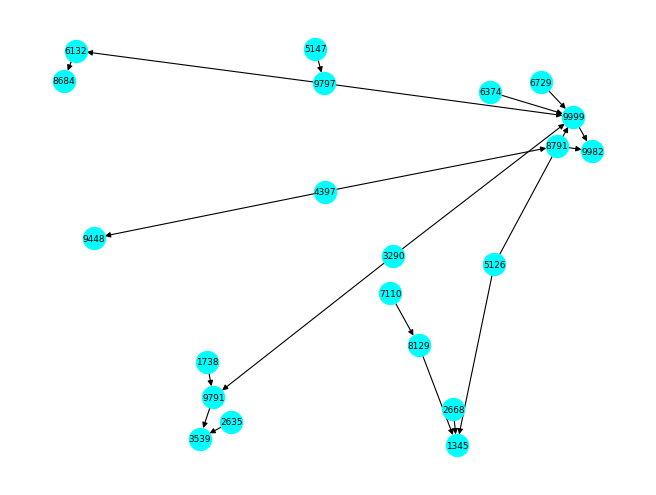

In [923]:
# Extracting nodes for community with nodes of interest using indices found in code above
node1 = [] # create an empty list for node1
node2 = [] # create an empty list for node2
j = 0 # initiate value of j=0

# for all nodes in source column in the dataset, find corresponding nodes in target column
for it in range(len(list1[j])):
    for t in range(len(sub_df['SOURCE'])):
        if list1[j][it] == sub_df['SOURCE'][t]:
            node1.append(list1[j][it])
        elif list1[j][it] == sub_df['TARGET'][t]:
            node2.append(list1[j][it])
                
source = [] # create an empty list for source 
target = [] # create an empty list for target

# For all nodes in source, find adjacent nodes in target to define edges between these nodes
for index in range(len(sub_df)):
    if sub_df['SOURCE'][index] in node1:
        if sub_df['TARGET'][index] in node2:
            source.append(sub_df['SOURCE'][index])
            target.append(sub_df['TARGET'][index])

# make a dataframe from nodes for source and target
group = pd.DataFrame(list(zip(source, target)),
               columns =['SOURCE', 'TARGET'])

# Define a new directed network using nodes of the above extracted network
first_group = nx.DiGraph()
first_group.add_edges_from([(row["SOURCE"], row["TARGET"]) for idx, row in group.iterrows()])

# Plot the network
plt.figure(figsize=(8,6), dpi = 80)
nx.draw(first_group, with_labels = True, node_size = 400, node_color = 'cyan', font_size = 8)
plt.show()

In [924]:
# Find number of nodes
first_group.number_of_nodes()

21

In [925]:
# Find number of edges
first_group.number_of_edges()

20

In [926]:
# find in degree for all nodes in the community network
first_group.in_degree()

InDegreeView({'3290': 0, '9791': 2, '4397': 0, '8791': 1, '9999': 5, '9982': 2, '7110': 0, '8129': 1, '6374': 0, '9797': 1, '6132': 1, '9448': 1, '2635': 0, '3539': 2, '1345': 3, '6729': 0, '5147': 0, '5126': 0, '8684': 1, '1738': 0, '2668': 0})

In [927]:
# find out degree for all nodes in the community network
first_group.out_degree()

OutDegreeView({'3290': 2, '9791': 1, '4397': 2, '8791': 1, '9999': 1, '9982': 0, '7110': 1, '8129': 1, '6374': 1, '9797': 2, '6132': 1, '9448': 0, '2635': 1, '3539': 0, '1345': 0, '6729': 1, '5147': 1, '5126': 2, '8684': 0, '1738': 1, '2668': 1})

In [928]:
# check degrees for all nodes in the above network
deg = first_group.degree()
print("Nodes        Degree ")
print(" ")
for degrees in deg:
    node = degrees[0]
    eq_deg = degrees[1]
    print(str(node) + '           ' + str(eq_deg))

Nodes        Degree 
 
3290           2
9791           3
4397           2
8791           2
9999           6
9982           2
7110           1
8129           2
6374           1
9797           3
6132           2
9448           1
2635           1
3539           2
1345           3
6729           1
5147           1
5126           2
8684           1
1738           1
2668           1


In [929]:
# Check closeness centrality for all nodes in the community network
kk = nx.closeness_centrality(first_group)
print("Nodes        Closeness ")
print("            Centrality ")
for k, v in kk.items():
    node = k
    cl = v
    print(str(node) + '           ' + str('%.4f' % cl))

Nodes        Closeness 
            Centrality 
3290           0.0000
9791           0.1000
4397           0.0000
8791           0.0500
9999           0.2571
9982           0.2382
7110           0.0000
8129           0.0500
6374           0.0000
9797           0.0500
6132           0.0667
9448           0.0500
2635           0.0000
3539           0.1333
1345           0.1600
6729           0.0000
5147           0.0000
5126           0.0000
8684           0.0750
1738           0.0000
2668           0.0000


In [930]:
# Check betweenness centrality for all nodes in the community network

kk = nx.betweenness_centrality(first_group)
print("Nodes       Betweenness ")
print("            Centrality ")
for k, v in kk.items():
    node = k
    cl = v
    print(str(node) + '          ' + str('%.4f' % cl))

Nodes       Betweenness 
            Centrality 
3290          0.0000
9791          0.0053
4397          0.0000
8791          0.0026
9999          0.0158
9982          0.0000
7110          0.0000
8129          0.0026
6374          0.0000
9797          0.0105
6132          0.0053
9448          0.0000
2635          0.0000
3539          0.0000
1345          0.0000
6729          0.0000
5147          0.0000
5126          0.0000
8684          0.0000
1738          0.0000
2668          0.0000


<Figure size 2400x1800 with 0 Axes>

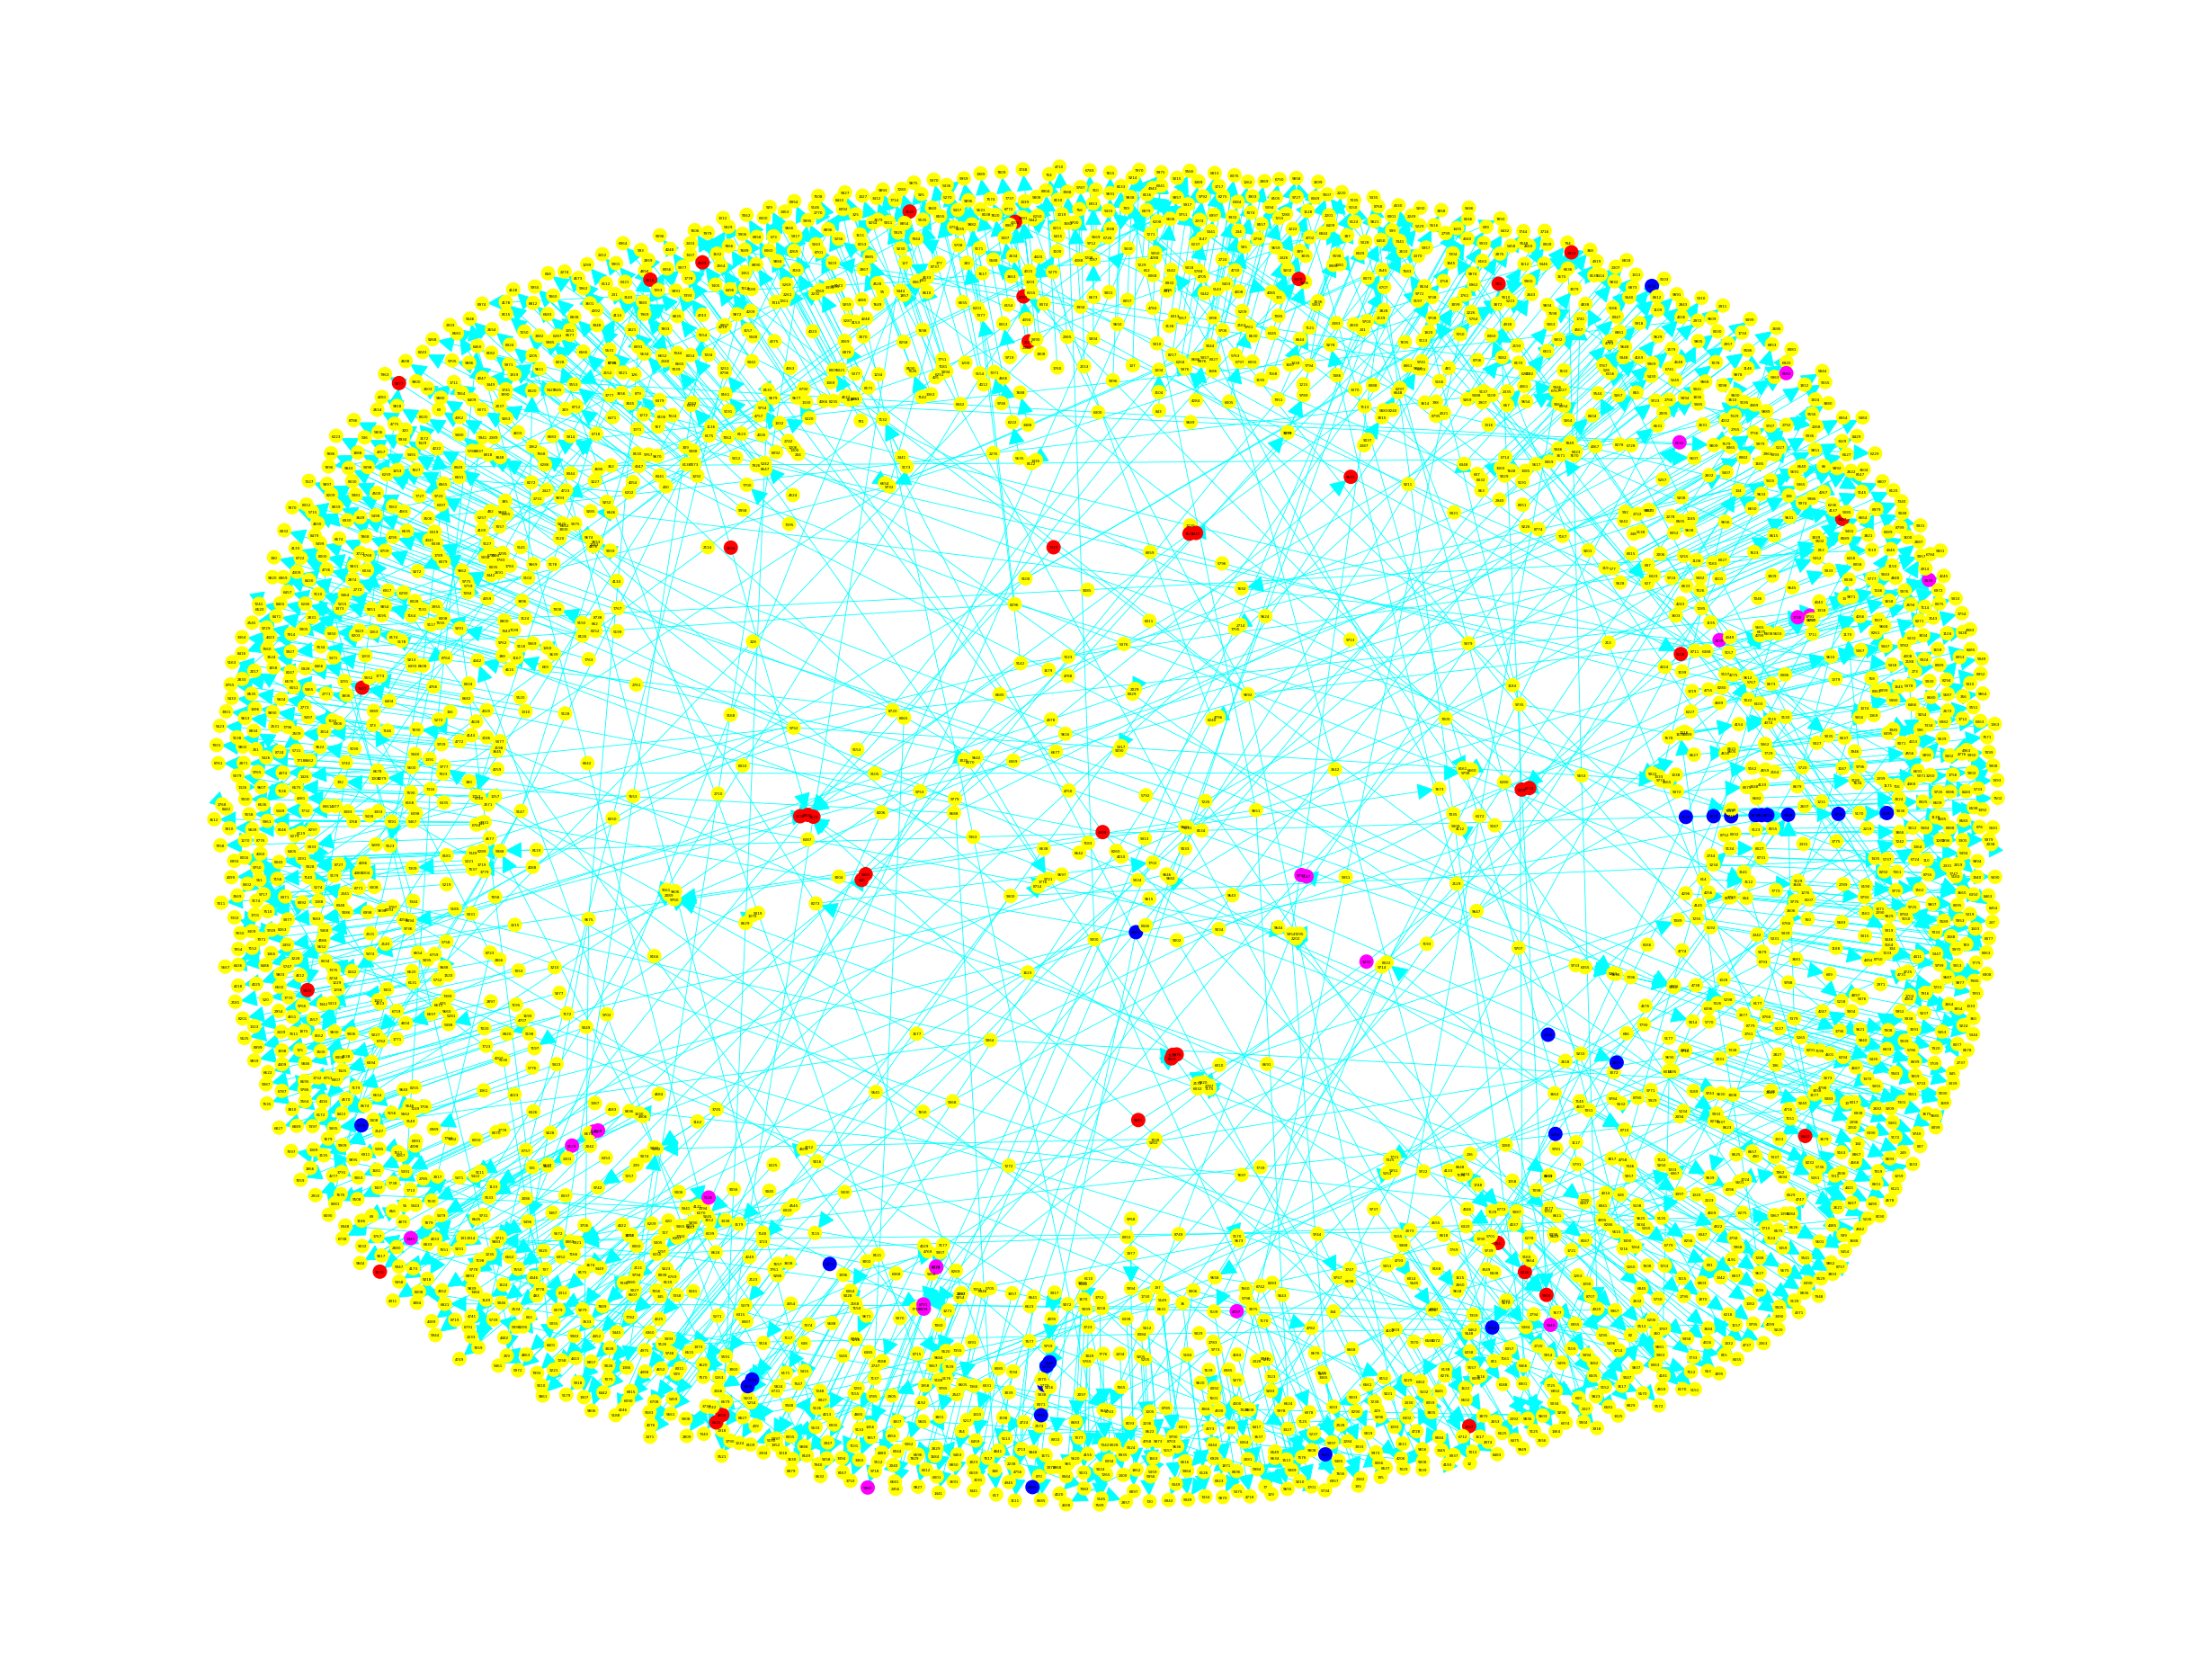

In [604]:
# Show graph of the main transactions dataset, print graph with different colors for different communities.

color_map = []
for node in A:
    if node in list1[0]:
        color_map.append("red")
    elif node in list1[1]:
        color_map.append("blue")
    elif node in list1[2]:
        color_map.append("purple")
    elif node in list1[3]:
        color_map.append("magenta")   
    else:
        color_map.append("yellow")
        
plt.figure(figsize=(8,6), dpi = 300)

#Plot graph with spring layout
from networkx.drawing import spring_layout
pos = nx.spring_layout(A)
nx.draw(A, with_labels = True, pos = pos, node_size = 8, node_color = color_map, font_size = 1,
        edge_color = 'cyan', width = 0.2)
plt.show()